<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/Unsupervised_kmean_PCA_Elbow_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import KMeans

In [ ]:
credit = pd.read_csv('/content/train.csv')

/tmp/ipython-input-3226712452.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  credit = pd.read_csv('/content/train.csv')


In [ ]:
credit

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
credit.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
credit['Name'] = credit['Name'].fillna('Unknown')

In [ ]:
credit['Monthly_Inhand_Salary'] = credit['Monthly_Inhand_Salary'].fillna(0)

In [ ]:
credit['Type_of_Loan'] = credit['Type_of_Loan'].fillna('unknown')

In [ ]:
credit.value_counts('Num_of_Delayed_Payment')

,count
Num_of_Delayed_Payment,
19,5327
17,5261
16,5173
10,5153
18,5083
...,...
2450,1
2431,1
2429,1


In [ ]:
credit['Num_of_Delayed_Payment'] = credit['Num_of_Delayed_Payment'].fillna(0)

In [ ]:
credit['Num_Credit_Inquiries'] = credit['Num_Credit_Inquiries'].fillna(0)

In [ ]:
credit['Credit_History_Age'] = credit['Credit_History_Age'].fillna('unknown')

In [ ]:
credit.value_counts('Amount_invested_monthly')

,count
Amount_invested_monthly,
__10000__,4305
0.0,169
475.2236276218627,1
475.1908314274084,1
475.17795532128923,1
...,...
199.38209262355699,1
199.37354042252696,1
199.3656076568955,1


In [ ]:
credit['Amount_invested_monthly'].dtype

dtype('O')

In [ ]:
credit['Amount_invested_monthly'] = credit['Amount_invested_monthly'].fillna(0)

In [ ]:
credit.value_counts('Monthly_Balance')

,count
Monthly_Balance,
__-333333333333333333333333333__,9
401.2549759276744,1
401.24824629939866,1
401.247390724804,1
401.24139760291933,1
...,...
285.14651953327217,1
285.1452259270754,1
285.14347428430295,1


In [ ]:
credit['Monthly_Balance'] = credit['Monthly_Balance'].fillna(0)

In [ ]:
credit.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [ ]:
credit.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in credit.select_dtypes(include=['object']).columns:
  # Convert all elements to string type to ensure uniformity for LabelEncoder
  credit[i] = le.fit_transform(credit[i].astype(str))

In [ ]:
credit

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,16406,12320,3,84,308,10205,12,6011,1824.843333,3,4,3,244,128,3,685,1185,4.0,3,12062,26.822620,180,1,49.574949,81514,3,42381,0
1,16417,12320,2,84,308,10205,12,6011,0.000000,3,4,3,244,128,-1,6,1185,4.0,1,12062,31.944960,404,1,49.574949,7662,4,31504,0
2,16428,12320,6,84,0,10205,12,6011,0.000000,3,4,3,244,128,3,685,4383,4.0,1,12062,28.609352,184,1,49.574949,82227,5,48640,0
3,16441,12320,0,84,308,10205,12,6011,0.000000,3,4,3,244,128,5,570,3906,4.0,1,12062,31.377862,185,1,49.574949,30359,6,11594,0
4,16452,12320,7,84,308,10205,12,6011,1824.843333,3,4,3,244,128,6,6,1185,4.0,1,12062,24.797347,186,1,49.574949,55364,2,51835,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,62788,8833,0,6528,364,1009,9,11484,3359.415833,4,6,7,174,683,23,685,1208,3.0,3,10142,34.663572,307,1,35.104023,69765,1,76393,1
99996,62789,8833,7,6528,364,1009,9,11484,3359.415833,4,6,7,174,683,18,685,1208,3.0,3,10142,40.565631,308,1,35.104023,65283,2,78094,1
99997,62790,8833,5,6528,364,1009,9,11484,3359.415833,4,6,5729,174,683,27,671,1208,3.0,1,10142,41.255522,309,1,35.104023,37144,1,79794,1
99998,62791,8833,4,6528,364,1009,9,11484,3359.415833,4,6,7,174,683,20,6,1208,3.0,1,10142,33.638208,310,1,35.104023,39062,4,44643,2


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
for i in credit.columns:
  credit[i] = sc.fit_transform(credit[[i]])

In [ ]:
credit

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-1.163713,1.682306,-0.218218,-1.782839,-0.917716,1.136723,0.964732,-0.642799,-0.528078,-0.120024,-0.143150,-0.148934,0.409569,-1.714207,-1.215932,1.918107,-1.137078,-0.121317,1.402073,1.438263,-1.067562,-0.287094,-0.58149,-0.162960,1.266520,-0.230434,-0.222722,-1.769439
1,-1.163332,1.682306,-0.654654,-1.782839,-0.917716,1.136723,0.964732,-0.642799,-1.081868,-0.120024,-0.143150,-0.148934,0.409569,-1.714207,-1.485110,-0.934394,-1.137078,-0.121317,-0.571010,1.438263,-0.066489,1.564280,-0.58149,-0.162960,-1.321238,0.260855,-0.599672,-1.769439
2,-1.162951,1.682306,1.091089,-1.782839,-2.093302,1.136723,0.964732,-0.642799,-1.081868,-0.120024,-0.143150,-0.148934,0.409569,-1.714207,-1.215932,1.918107,1.390970,-0.121317,-0.571010,1.438263,-0.718376,-0.254033,-0.58149,-0.162960,1.291503,0.752144,-0.005812,-1.769439
3,-1.162501,1.682306,-1.527525,-1.782839,-0.917716,1.136723,0.964732,-0.642799,-1.081868,-0.120024,-0.143150,-0.148934,0.409569,-1.714207,-1.081342,1.434989,1.013897,-0.121317,-0.571010,1.438263,-0.177318,-0.245768,-0.58149,-0.162960,-0.525940,1.243433,-1.289668,-1.769439
4,-1.162119,1.682306,1.527525,-1.782839,-0.917716,1.136723,0.964732,-0.642799,-0.528078,-0.120024,-0.143150,-0.148934,0.409569,-1.714207,-1.014048,-0.934394,-1.137078,-0.121317,-0.571010,1.438263,-1.463366,-0.237503,-0.58149,-0.162960,0.350229,-0.721723,0.104914,-1.769439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.443007,0.715961,-1.527525,0.338765,-0.703973,-1.292112,0.318218,0.355551,-0.062377,-0.111506,-0.127653,-0.140358,-0.151659,-1.433212,0.129961,1.918107,-1.118896,-0.126544,1.402073,0.934341,0.464817,0.762569,-0.58149,-0.164702,0.854837,-1.213013,0.955989,-0.462094
99996,0.443041,0.715961,1.527525,0.338765,-0.703973,-1.292112,0.318218,0.355551,-0.062377,-0.111506,-0.127653,-0.140358,-0.151659,-1.433212,-0.206512,1.918107,-1.118896,-0.126544,1.402073,0.934341,1.618273,0.770834,-0.58149,-0.164702,0.697789,-0.721723,1.014939,-0.462094
99997,0.443076,0.715961,0.654654,0.338765,-0.703973,-1.292112,0.318218,0.355551,-0.062377,-0.111506,-0.127653,12.127547,-0.151659,-1.433212,0.399139,1.859293,-1.118896,-0.126544,-0.571010,0.934341,1.753100,0.779099,-0.58149,-0.164702,-0.288195,-1.213013,1.073853,-0.462094
99998,0.443111,0.715961,0.218218,0.338765,-0.703973,-1.292112,0.318218,0.355551,-0.062377,-0.111506,-0.127653,-0.140358,-0.151659,-1.433212,-0.071923,-0.934394,-1.118896,-0.126544,-0.571010,0.934341,0.264427,0.787364,-0.58149,-0.164702,-0.220989,0.260855,-0.144331,0.845251


In [ ]:
wcss = []

In [ ]:
for i in range(1,11):
  K_means = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
  K_means.fit(credit)
  wcss.append(K_means.inertia_)


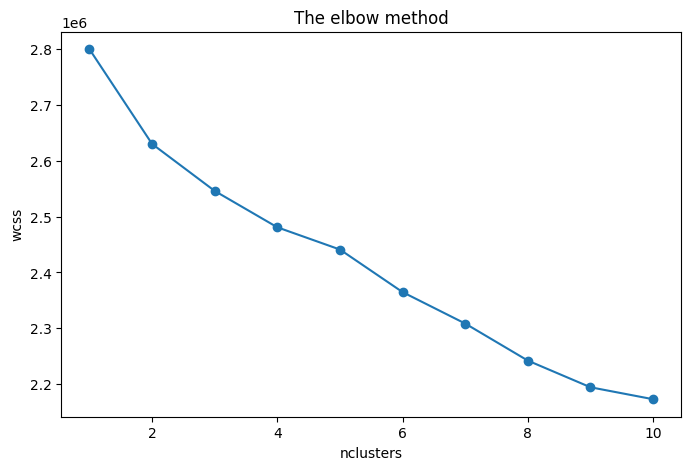

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker = 'o')
plt.title("The elbow method")
plt.xlabel('nclusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
Model = KMeans(n_clusters = 2,init = 'k-means++',random_state = 42)

y_kmeans = Model.fit_predict(credit)


TypeError: float() argument must be a string or a real number, not 'KMeans'

In [ ]:
credit.dtypes

,0
ID,float64
Customer_ID,float64
Month,float64
Name,float64
Age,float64
SSN,float64
Occupation,float64
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64


In [ ]:
credit['cluster'] = y_kmeans

In [ ]:
Model = KMeans(n_clusters = 2,init = 'k-means++',random_state = 42, n_init='auto')

# Drop the 'cluster' column if it exists, as it's not a feature for clustering
if 'cluster' in credit.columns:
    credit_for_clustering = credit.drop(columns=['cluster'])
else:
    credit_for_clustering = credit

y_kmeans = Model.fit_predict(credit_for_clustering)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

# Drop the 'cluster' column as it's not a feature for PCA and might contain non-numerical data
credit_for_pca = credit.drop(columns=['cluster']) if 'cluster' in credit.columns else credit

x_pca = pca.fit_transform(credit_for_pca)
x_pca

array([[-0.38878967,  1.2073554 ],
       [ 0.50726181,  1.2461057 ],
       [ 0.3997983 ,  1.67851833],
       ...,
       [-0.77570445, -1.62722174],
       [ 0.5585331 , -0.39530975],
       [-0.84105624, -1.02816492]])

<Axes: >

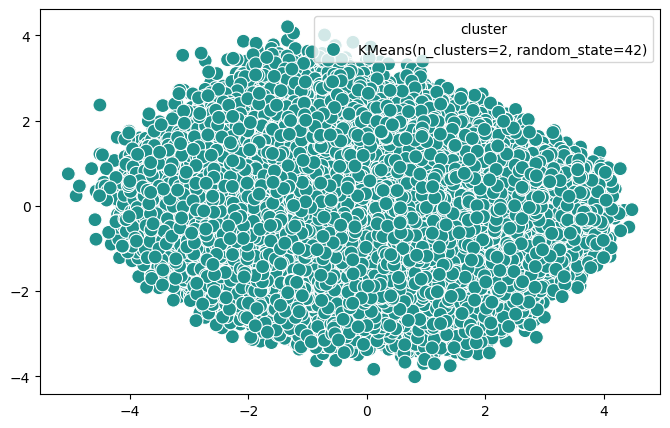

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue = credit['cluster'],palette = 'viridis',s=100)